In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
import matplotlib.pyplot as plt
import seaborn as sns

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [2]:
f_npa=np.random.normal(0,1,10000)
s_npa=f_npa+np.random.normal(0,3,10000)
t_npa=2*f_npa+s_npa

tot_npa=np.array((f_npa,s_npa,t_npa))

V_la:  [[-0.11577045 -0.81649658  0.56562402]
 [-0.57697468 -0.40824829 -0.70741329]
 [-0.80851557  0.40824829  0.42383476]]
l_la:  [ 2.67586302e+01 -1.37103820e-15  1.99090401e+00] 

U_SVD:  [[-0.11577045  0.56562402 -0.81649658]
 [-0.57697468 -0.70741329 -0.40824829]
 [-0.80851557  0.42383476  0.40824829]]
spectrum_SVD:  [2.67586302e+01 1.99090401e+00 6.76753492e-16] 

fist eigenvalue:  0.9307500429068223
second eigenvalue:  -4.768905784016339e-17
third eigenvalue:  0.06924995709317752 

V0:  [[-0.11576999 -0.81649658  0.56562412]
 [-0.57697525 -0.40824829 -0.70741282]
 [-0.80851523  0.40824829  0.42383541]]
l0:  [2.67586329e+01 2.07768448e-15 1.99105602e+00] 



<function matplotlib.pyplot.show(close=None, block=None)>

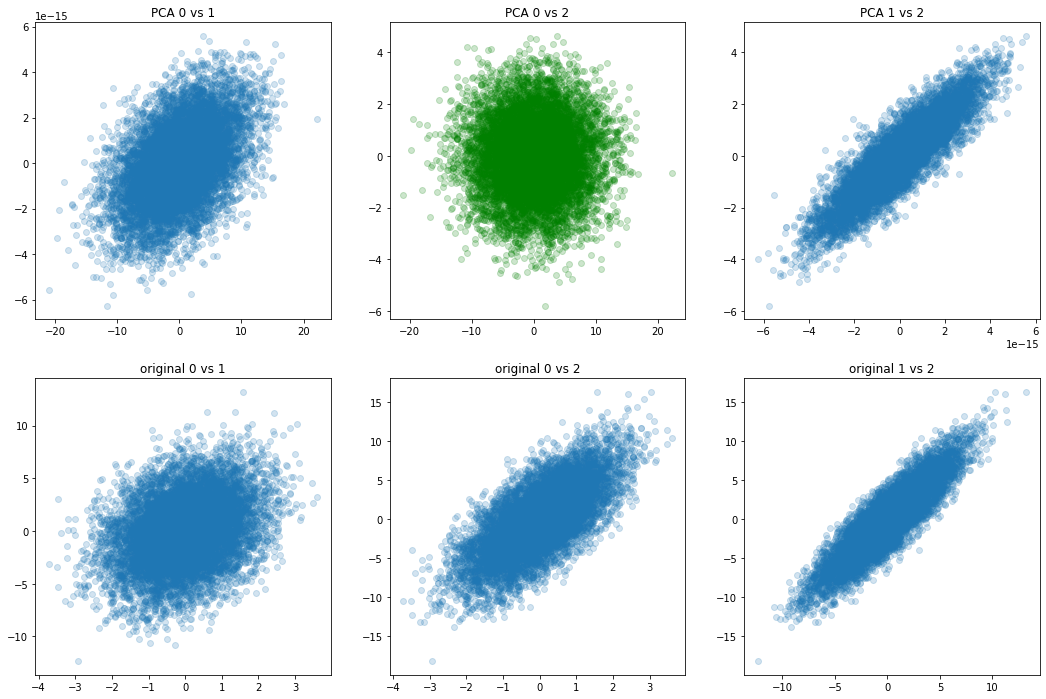

In [3]:
#print(tot_npa)

#EIGEN WITH LINALG

npa_cov=np.cov(tot_npa)
l,V=la.eig(npa_cov)
print('V_la: ',V)
print('l_la: ',np.real_if_close(l),'\n')

#EIGEN WITH SVD

U, spectrum, Vt = la.svd(npa_cov)
print('U_SVD: ',U)
print('spectrum_SVD: ', spectrum,'\n')

#we have a little difference in the value of one eigenvalue, probabilly due to the machine precision

#percentages

print("fist eigenvalue: ", np.real_if_close(l[0]/sum(l)))
print("second eigenvalue: ", np.real_if_close(l[1]/sum(l)))
print("third eigenvalue: ", np.real_if_close(l[2]/sum(l)),'\n')

#x1 and x2 contain together more than the 99% or the variability of the sistem. That's bacause x2 contains x1 and
#x3 is a combination of x1 and x2

#so if we keep only the first and the third columns, we mantain most of the variability of the system


#covariance matrix manually built
l0, V0 = np.linalg.eig(np.dot(tot_npa, tot_npa.T)/(len(f_npa)-1))
print ('V0: ', V0)
print ('l0: ', l0, '\n')


new_npa=np.dot(V.T,tot_npa)

#scatter=plt.scatter(x=new_npa[0],y=new_npa[1],alpha=0.1)
fig = plt.figure(figsize=(18, 12))
gridsize = (2, 3)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1=plt.scatter(new_npa[0],new_npa[1],alpha=0.2)
plt.title('PCA 0 vs 1')
plt.show
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2=plt.scatter(new_npa[0],new_npa[2],c='g',alpha=0.2)
plt.title('PCA 0 vs 2')
plt.show
ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3=plt.scatter(new_npa[1],new_npa[2],alpha=0.2)
plt.title('PCA 1 vs 2')
plt.show
ax4 = plt.subplot2grid(gridsize, (1, 0))
ax4=plt.scatter(tot_npa[0],tot_npa[1],alpha=0.2)
plt.title('original 0 vs 1')
plt.show
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax5=plt.scatter(tot_npa[0],tot_npa[2],alpha=0.2)
plt.title('original 0 vs 2')
plt.show
ax6 = plt.subplot2grid(gridsize, (1, 2))
ax6=plt.scatter(tot_npa[1],tot_npa[2],alpha=0.2)
plt.title('original 1 vs 2')
plt.show


2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

In [4]:
sigma_noise=[0.004,0.002,0.005,0.001,0.01,0.0009,0.011,0.007,0.0005,0.006]
noise=[]

#genrate arrays with noise

for s in sigma_noise:
    noise.append(np.random.normal(0,s,10000))

f_npa_new=f_npa+sum(noise)

for n in noise:
    permutation = np.random.permutation(len(n))
    n = n[permutation]

s_npa_new=s_npa+sum(noise)

for n in noise:
    permutation = np.random.permutation(len(n))
    n = n[permutation]

t_npa_new=t_npa+sum(noise)

tot_npa_new=np.array((f_npa_new,s_npa_new,t_npa_new))

fist eigenvalue:  0.9307425164859915
second eigenvalue:  8.334415135327915e-06
third eigenvalue:  0.06924914909887332


<function matplotlib.pyplot.show(close=None, block=None)>

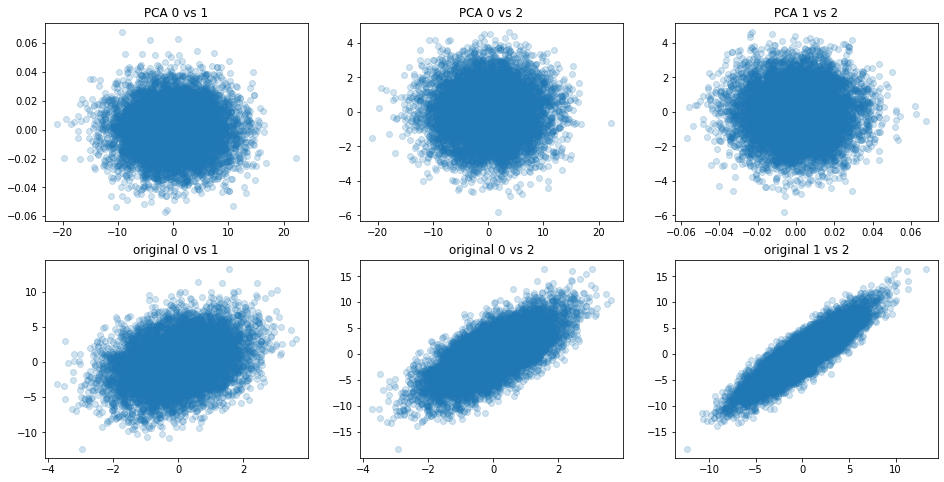

In [5]:
#PCA

npa_cov_new=np.cov(tot_npa_new)
l,V=la.eig(npa_cov_new)

print("fist eigenvalue: ", np.real_if_close(l[0]/sum(l)))
print("second eigenvalue: ", np.real_if_close(l[1]/sum(l)))
print("third eigenvalue: ", np.real_if_close(l[2]/sum(l)))

new_npa=np.dot(V.T,tot_npa_new)

fig = plt.figure(figsize=(16, 8))
gridsize = (2, 3)
ax1 = plt.subplot2grid(gridsize, (0, 0))
ax1=plt.scatter(new_npa[0],new_npa[1],alpha=0.2)
plt.title('PCA 0 vs 1')
plt.show
ax2 = plt.subplot2grid(gridsize, (0, 1))
ax2=plt.scatter(new_npa[0],new_npa[2],alpha=0.2)
plt.title('PCA 0 vs 2')
plt.show
ax3 = plt.subplot2grid(gridsize, (0, 2))
ax3=plt.scatter(new_npa[1],new_npa[2],alpha=0.2)
plt.title('PCA 1 vs 2')
plt.show
ax4 = plt.subplot2grid(gridsize, (1, 0))
ax4=plt.scatter(tot_npa[0],tot_npa[1],alpha=0.2)
plt.title('original 0 vs 1')
plt.show
ax5 = plt.subplot2grid(gridsize, (1, 1))
ax5=plt.scatter(tot_npa[0],tot_npa[2],alpha=0.2)
plt.title('original 0 vs 2')
plt.show
ax6 = plt.subplot2grid(gridsize, (1, 2))
ax6=plt.scatter(tot_npa[1],tot_npa[2],alpha=0.2)
plt.title('original 1 vs 2')
plt.show

The data apper to be originally less correlated to each other, and the difference between the weights of the different eigenvalues is smaller. So the information in less concentrated in few parameters compared to the previous case

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [6]:
from scipy.spatial.transform import Rotation as R
from mpl_toolkits.mplot3d import Axes3D

[3.0, 0.1099802085982416, 0.0]
[ 2.19908809 -2.04355259  0.        ]
ndcs [-0.5836367717528339, -0.4966185861322012, 2.122745350517027]
[2.84989063 2.78907636 2.71032417 ... 1.65048312 1.77109408 1.98682899]


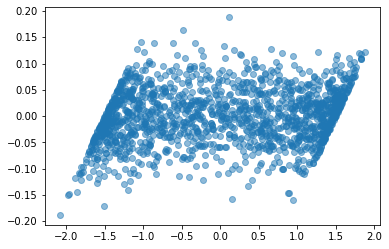

In [7]:
def spring_motion (t,A,w):
    x=np.cos(w*t)
    return A*x

time=np.linspace(0,150,1500)
x=spring_motion(time,3,1)
y=np.random.normal(0,0.2,len(x))
z=np.zeros(len(x))
spring=[]

for xi,yi,zi in zip (x,y,z):
    spring.append([xi,yi,zi])

sprnig=np.array(spring)
#print(spring)

theta=45

rz = R.from_euler('z', theta, degrees=True)
rz.as_matrix()

def rot_phi (trip,phi):
    phig=(np.pi/180)*phi
    ntrip=[0,0,0]
    mod_p=pow((trip[0]**2+trip[1]**2),1/2)
    ca=mod_p/trip[0]
    sa=mod_p/trip[1]
    st=np.sin(theta)
    ct=np.cos(theta)
    sp=np.sin(phi)
    cp=np.cos(phi)
    
    ntrip[0]=(np.dot([trip[0],trip[1]],[ct,st])*cp)/ct
    ntrip[1]=(np.dot([trip[0],trip[1]],[ct,st])*cp)*np.tan(theta)
    
    if trip[0]>0:
        ntrip[2]=pow((trip[0]**2+trip[1]**2),1/2)*np.sin(phig)
    else:
        ntrip[2]=-pow((trip[0]**2+trip[1]**2),1/2)*np.sin(phig)
    
    return ntrip

print(spring[0])
print(np.dot(spring[0],rz.as_matrix()))
print('ndcs', rot_phi(np.dot(spring[0],rz.as_matrix()),45))

angles={'theta':[20,43,-12,120,175,15],'phi':[35,67,104,-15,134,45]}
nspr=[]

for theta,phi in zip (angles['theta'],angles['phi']):
    rx=R.from_euler('x', phi, degrees=True)
    rz = R.from_euler('z', theta, degrees=True)
    rot_dat=[]
    for i in range(len(spring)):
        rot_dat.append( np.dot(np.dot(spring[i],rx.as_matrix()),rz.as_matrix()) )
    nspr.append(rot_dat)

nspr=np.array(nspr)
print(nspr[0][:,0])
plt.scatter(nspr[3][:,0],nspr[3][:,2],alpha=0.5)



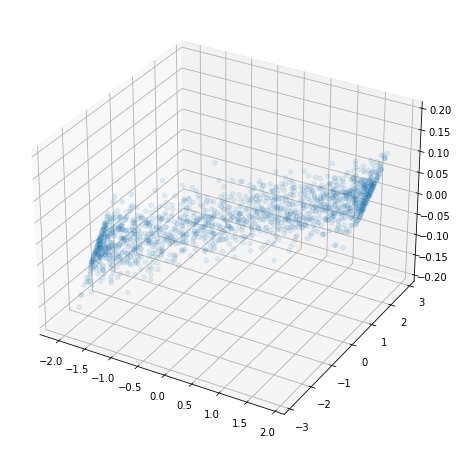

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(nspr[3][:,0],nspr[3][:,1],nspr[3][:,2], alpha=0.1)

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [9]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ~/data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ~/data/ 